In [1]:
import numpy as np
import pandas as pd

In [2]:
weather = pd.read_csv('Datasets/weather.csv', index_col = 'Date')
price = pd.read_csv('Datasets/Data.csv', index_col='Date', parse_dates=True)

In [3]:
price = price[(price.index > '2010-01-01') & (price.index < '2019-01-01')]
price = price[::-1]
price.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2010-01-04,418.50,415.75,426.25,413.25,140.55K,1.03%
2010-01-05,418.75,417.25,420.00,415.25,80.97K,0.06%
2010-01-06,421.75,418.00,422.00,416.00,96.45K,0.72%
2010-01-07,417.50,421.00,424.00,414.50,137.40K,-1.01%
2010-01-08,423.00,417.50,423.75,415.00,135.00K,1.32%


In [4]:
weather.head()

,TMAX,TMIN,PRCP,SNOW
Date,,,,
2010-01-01,-31.046402,-74.829545,3.594223,4.698390
2010-01-02,-52.175943,-101.472170,3.552830,7.444340
2010-01-03,-57.468414,-103.546093,2.228358,5.344408
2010-01-04,-46.521938,-88.392139,2.521024,5.994973
2010-01-05,-40.622883,-76.595881,2.895195,4.625172


In [5]:
#Merge the two dataframes based on Index
final = pd.concat([price, weather],axis=1)
#final = final.fillna(0)
final.dropna(inplace=True)
index = final.index.values
final.head()

,Price,Open,High,Low,Vol.,Change %,TMAX,TMIN,PRCP,SNOW
Date,,,,,,,,,,
2010-01-04,418.50,415.75,426.25,413.25,140.55K,1.03%,-46.521938,-88.392139,2.521024,5.994973
2010-01-05,418.75,417.25,420.00,415.25,80.97K,0.06%,-40.622883,-76.595881,2.895195,4.625172
2010-01-06,421.75,418.00,422.00,416.00,96.45K,0.72%,-34.017431,-72.576606,3.870642,3.200000
2010-01-07,417.50,421.00,424.00,414.50,137.40K,-1.01%,-30.523176,-61.433685,31.739330,45.121615
2010-01-08,423.00,417.50,423.75,415.00,135.00K,1.32%,-35.299818,-68.329845,32.447680,47.646497


In [6]:
final = final.drop(['Vol.','Change %'], axis=1)
final.head()

,Price,Open,High,Low,TMAX,TMIN,PRCP,SNOW
Date,,,,,,,,
2010-01-04,418.50,415.75,426.25,413.25,-46.521938,-88.392139,2.521024,5.994973
2010-01-05,418.75,417.25,420.00,415.25,-40.622883,-76.595881,2.895195,4.625172
2010-01-06,421.75,418.00,422.00,416.00,-34.017431,-72.576606,3.870642,3.200000
2010-01-07,417.50,421.00,424.00,414.50,-30.523176,-61.433685,31.739330,45.121615
2010-01-08,423.00,417.50,423.75,415.00,-35.299818,-68.329845,32.447680,47.646497


In [11]:
import seaborn as sns
%matplotlib inline

 We can tell that there is no correlation between weather data and Price

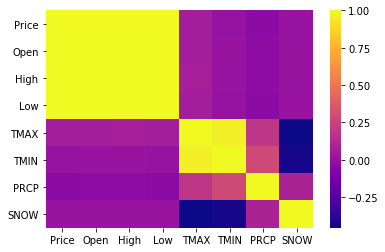

In [13]:
sns.heatmap(final.corr(), cmap='plasma')

Even though there is no visible correlation between there data, We will feed this into the LSTM model, see if the Network can find any connection between them

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
labels = final.drop(['Price','Vol.','Change %'], axis=1)

In [17]:
labels = pd.DataFrame(scaler.fit_transform(labels))
labels.columns = ['Open', 'High', 'Low', 'TMAX', 'TMIN','PRCP','SNOW']
labels = labels.set_index(index)

In [18]:
labels.head()

,Open,High,Low,TMAX,TMIN,PRCP,SNOW
2010-01-04,0.215334,0.221808,0.215141,0.150927,0.125927,0.007841,0.050645
2010-01-05,0.218173,0.210158,0.218975,0.179005,0.185362,0.009005,0.039073
2010-01-06,0.219593,0.213886,0.220412,0.210446,0.205613,0.012040,0.027033
2010-01-07,0.225272,0.217614,0.217537,0.227078,0.261756,0.098758,0.381185
2010-01-08,0.218646,0.217148,0.218495,0.204342,0.227010,0.100962,0.402515


In [19]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2429 entries, 2010-01-04 to 2018-12-31
Data columns (total 7 columns):
Open    2429 non-null float64
High    2429 non-null float64
Low     2429 non-null float64
TMAX    2429 non-null float64
TMIN    2429 non-null float64
PRCP    2429 non-null float64
SNOW    2429 non-null float64
dtypes: float64(7)
memory usage: 151.8 KB


In [42]:
#Train Test Split X
X_test= labels.tail(429)
X_train = labels.head(2000)
X_train.shape

(2000, 7)

In [21]:
final[final['Price']==0]

,Price,Open,High,Low,Vol.,Change %,TMAX,TMIN,PRCP,SNOW
Date,,,,,,,,,,


In [22]:
prices = pd.DataFrame(scaler.fit_transform(pd.DataFrame(final['Price'])))
prices.columns = ['Price']
prices = prices.set_index(index)
prices=prices['Price'].map(lambda x: prices.Price.mean() if x == 0 else x)

In [23]:
# Test Train split Y
y_test= prices.tail(429)
y_train = prices.head(2000)

In [24]:
y_train[y_train==0]

Series([], Name: Price, dtype: float64)

In [27]:
import tensorflow as tf
tf.__version__

'2.0.0-beta1'

Reshape X_train and X_test data for LSTM usage 

In [93]:
X_train.head()

,Open,High,Low,TMAX,TMIN,PRCP,SNOW
2010-01-04,0.215334,0.221808,0.215141,0.150927,0.125927,0.007841,0.050645
2010-01-05,0.218173,0.210158,0.218975,0.179005,0.185362,0.009005,0.039073
2010-01-06,0.219593,0.213886,0.220412,0.210446,0.205613,0.012040,0.027033
2010-01-07,0.225272,0.217614,0.217537,0.227078,0.261756,0.098758,0.381185
2010-01-08,0.218646,0.217148,0.218495,0.204342,0.227010,0.100962,0.402515


In [94]:
X_test.head()

,Open,High,Low,TMAX,TMIN,PRCP,SNOW
2017-05-17,0.123048,0.121156,0.125060,0.765509,0.798645,0.219243,0.0
2017-05-18,0.131566,0.119758,0.121227,0.716269,0.760000,0.372151,0.0
2017-05-19,0.121155,0.122554,0.124581,0.657767,0.669797,0.127612,0.0
2017-05-22,0.133933,0.130941,0.135601,0.622035,0.681830,0.049536,0.0
2017-05-23,0.137719,0.127679,0.130331,0.649757,0.700345,0.054930,0.0


In [14]:
TIME_STEPS = 60
BATCH_SIZE = 1
EPOCHS =50

scaler = MinMaxScaler()
final = pd.DataFrame(scaler.fit_transform(final))
final.columns = ['Price','Open', 'High', 'Low', 'TMAX', 'TMIN','PRCP','SNOW']
final.head()

,Price,Open,High,Low,TMAX,TMIN,PRCP,SNOW
0,0.220859,0.215334,0.221808,0.215141,0.150927,0.125927,0.007841,0.050645
1,0.221331,0.218173,0.210158,0.218975,0.179005,0.185362,0.009005,0.039073
2,0.226994,0.219593,0.213886,0.220412,0.210446,0.205613,0.012040,0.027033
3,0.218971,0.225272,0.217614,0.217537,0.227078,0.261756,0.098758,0.381185
4,0.229353,0.218646,0.217148,0.218495,0.204342,0.227010,0.100962,0.402515


In [15]:
X_train = []
y_train = []
for i in range(60,len(final)):
    X_train.append(final[i-60:i,0])
    y_train.append(final[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

TypeError: '(slice(0, 60, None), 0)' is an invalid key

In [125]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units=512,
              return_sequences=True, input_shape=(TIME_STEPS, X_train.shape[1])),
    tf.keras.layers.LSTM(units=512,
              return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.GRU(units=128,
              return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1)

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_69 (LSTM)               (None, 60, 512)           1064960   
_________________________________________________________________
lstm_70 (LSTM)               (None, 60, 512)           2099200   
_________________________________________________________________
dropout_92 (Dropout)         (None, 60, 512)           0         
_________________________________________________________________
gru_98 (GRU)                 (None, 60, 128)           246528    
_________________________________________________________________
dropout_93 (Dropout)         (None, 60, 128)           0         
_________________________________________________________________
dense_110 (Dense)            (None, 60, 64)            8256      
_________________________________________________________________
dense_111 (Dense)            (None, 60, 1)           

ValueError: Error when checking input: expected lstm_69_input to have 3 dimensions, but got array with shape (2000, 7)

In [ ]:
predictions = model.predict(X_test)

In [239]:
results = np.array(predictions).reshape(429
                                        ,1)

In [240]:
results = scaler.inverse_transform(results)
y_test_scaled = scaler.inverse_transform(np.array(y_test).reshape(429,1))
results[0]

array([366.56537], dtype=float32)

In [241]:
y_test_scaled[0]

array([371.5])

In [242]:
pred = pd.DataFrame(results)

In [243]:
true = pd.DataFrame(y_test_scaled)

In [244]:
date_rng = pd.date_range(start='28-10-2017', end='31-12-2018', freq='D')
dq = pd.DataFrame(date_rng, columns=['date'])

In [245]:
pred['Date'] = dq
pred.columns = ['Predictions', 'Date']
true['Date'] = dq
true.columns = ['Actual', 'Date']
final_results = pd.merge(pred, true, on='Date')
final_results.set_index(final_results.Date, inplace = True)
final_results.drop('Date', axis=1, inplace=True)
final_results['Difference %'] = ((final_results.Actual- final_results.Predictions)/final_results.Actual)
final_results['Difference'] = (final_results.Actual- final_results.Predictions)
final_results.head()

,Predictions,Actual,Difference %,Difference
Date,,,,
2017-10-28,366.565369,371.5,0.013283,4.934631
2017-10-29,366.075958,366.0,-0.000208,-0.075958
2017-10-30,367.498352,372.5,0.013427,5.001648
2017-10-31,372.790405,375.0,0.005892,2.209595
2017-11-01,372.042419,369.5,-0.006881,-2.542419


In [246]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

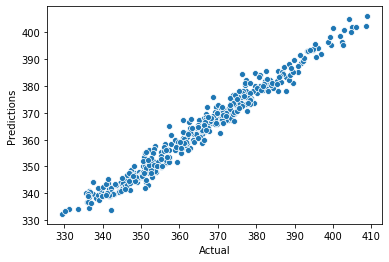

In [247]:
sns.scatterplot('Actual', 'Predictions', data=final_results)

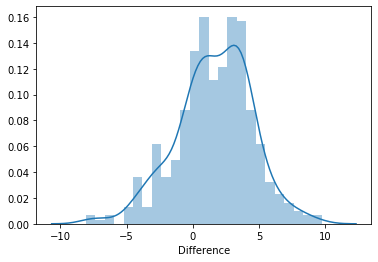

In [248]:
sns.distplot(final_results.Difference, bins=25)

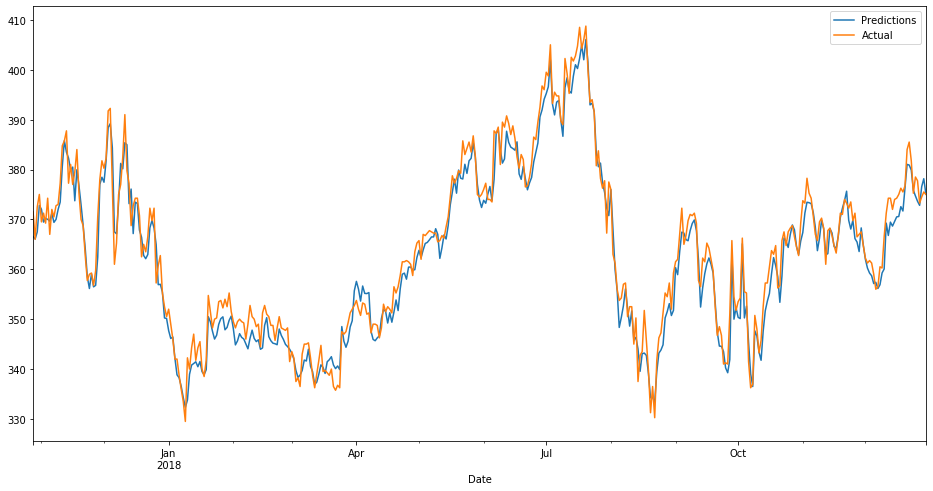

In [251]:
final_results.Predictions.plot( figsize=(16,8))
final_results.Actual.plot()
plt.legend()